# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Danika Najwa Ardelia
- **Email:** danikanajwaa@gmail.com
- **ID Dicoding:** https://www.dicoding.com/users/danikanjw

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana kondisi cuaca memengaruhi jumlah penyewaan sepeda?
- Pertanyaan 2: Pada pukul berapa jumlah penyewa mencapai puncaknya dan pada jam berapa jumlah penyewa paling rendah?
- Pertanyaan 3: Bagaimana perbandingan jumlah penyewa sepeda pada hari kerja dengan hari libur?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Memuat data csv ke dalam tabel `day_df` dan `hour_df`

In [3]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

**Menilai Data `day_df`**

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
day_df.duplicated().sum()

0

In [8]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


**Menilai Data `hour_df`**

In [9]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
hour_df.duplicated().sum()

0

In [12]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


**Insight:**
- Perlu mengubah tipe data `dteday` menjadi `datetime` pada `day_df`
- Perlu mengubah tipe data `dteday` menjadi `datetime` pada `hour_df`

### Cleaning Data

In [13]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [14]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Tipe data untuk `dteday` telah berhasil diubah menjadi `datetime`.

## Exploratory Data Analysis (EDA)

### Explore `day_df`

In [15]:
# Mencari jumlah penyewa tiap kondisi cuaca tertentu
day_df.groupby(by="weathersit").agg({
    "cnt": "sum"
}).reset_index()

,weathersit,cnt
0,1,2257952
1,2,996858
2,3,37869


- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


**Insight:** Dapat diperoleh informasi bahwa mayoritas pelanggan menyewa sepeda ketika kondisi cuaca sedang baik. 

In [16]:
# Menghitung total penyewaan untuk hari kerja dan hari libur
day_df.groupby(by="workingday").agg({
    "cnt": "sum"
}).reset_index()

,workingday,cnt
0,0,1000269
1,1,2292410


- 0: Hari libur atau akhir pekan
- 1: Hari kerja


**Insight:** Dapat diperoleh informasi bahwa mayoritas pelanggan menyewa sepeda ketika hari kerja.

### Explore `hour_df`

In [17]:
# Melihat jumlah penyewa sepeda pada setiap jam
hour_df.groupby(by="hr").agg({
    "cnt": "sum"
}).reset_index()

,hr,cnt
0,0,39130
1,1,24164
2,2,16352
3,3,8174
4,4,4428
5,5,14261
6,6,55132
7,7,154171
8,8,261001
9,9,159438


Skala 0-23 menunjukkan waktu berupa jam.

**Insight:** Dapat diperoleh indormasi bahwa jumlah sepeda yang tersewa paling banyak pada pukul 17.00 yaitu sebesar 336860. Sedangkan, jumlah paling sedikit dicapai pada pukul 04.00 yaitu sebesar 4428.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana kondisi cuaca memengaruhi jumlah penyewaan sepeda?

C:\Users\oni permatasari\AppData\Local\Temp\ipykernel_12136\3549265828.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weather_rentals, y='weathersit', x='cnt', palette=custom_colors)
C:\Users\oni permatasari\AppData\Local\Temp\ipykernel_12136\3549265828.py:17: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.barplot(data=weather_rentals, y='weathersit', x='cnt', palette=custom_colors)


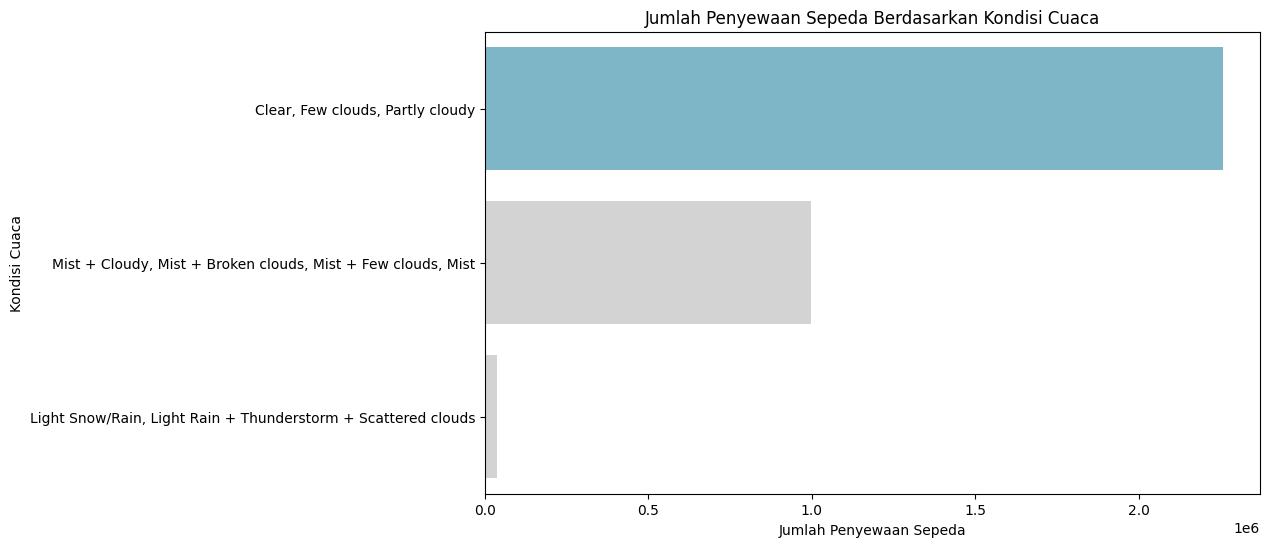

In [26]:
# Mengelompokkan penyewaan berdasarkan kondisi cuaca
weather_rentals = day_df.groupby('weathersit')['cnt'].sum().reset_index()

# Mengganti label weathersit dengan deskripsi cuaca
weather_rentals['weathersit'] = weather_rentals['weathersit'].map({
    1: 'Clear, Few clouds, Partly cloudy',
    2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
    3: 'Light Snow/Rain, Light Rain + Thunderstorm + Scattered clouds',
    4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'
})

# Menentukan warna khusus untuk setiap kondisi cuaca
custom_colors = ['#72BCD4',  '#D3D3D3', '#D3D3D3', '#D3D3D3']

# Membuat bar chart dengan sumbu y sebagai kategori
plt.figure(figsize=(10, 6))
sns.barplot(data=weather_rentals, y='weathersit', x='cnt', palette=custom_colors)
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Kondisi Cuaca')
plt.ylabel('Kondisi Cuaca')
plt.xlabel('Jumlah Penyewaan Sepeda')
plt.show()

**Insight:** Grafik di atas merupakan visualisasi dari jumlah penyewaan sepeda berdasarkan kondisi cuaca dalam bentuk Bar Chart. Dalam grafik tersebut, terlihat bahwa terjadi perunan dalam penyewaan sepeda seiring dengan memburuknya kondisi cuaca. Pada grafik tersebut ditunjukkan bahwa jumlah penyewaan sepeda paling banyak ketika cuaca sedang cerah atau sedikit berawan. 

### Pertanyaan 2: Pada pukul berapa jumlah penyewa mencapai puncaknya dan pada jam berapa jumlah penyewa paling rendah?


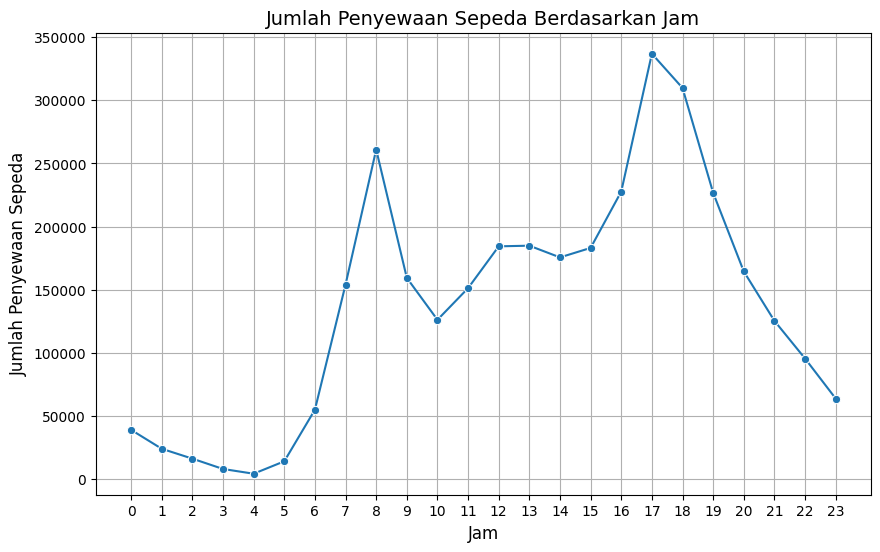

In [27]:
# Mengelompokkan penyewaan sepeda berdasarkan jam
hourly_rentals = hour_df.groupby('hr')['cnt'].sum().reset_index()

# Membuat line chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_rentals, x='hr', y='cnt', marker='o')

# Menambahkan judul dan label
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Jam', fontsize=14)
plt.xlabel('Jam', fontsize=12)
plt.ylabel('Jumlah Penyewaan Sepeda', fontsize=12)
plt.xticks(range(0, 24), fontsize=10)
plt.grid(True)
plt.show()

**Insight:** Grafik di atas merupakan visualisasi jumlah penyewaan sepeda berdasarkan jam dalam bentuk line chart. Terlihat adanya puncak penyewaan yang signifikan sekitar pukul 8 pagi, yang mengindikasikan banyak orang menggunakan sepeda untuk beraktivitas, sementara jumlah penyewaan sangat rendah sebelum puncak tersebut. Jumlah penyewaan terendah tercatat pada pukul 4 pagi, yang dapat dijelaskan oleh sedikitnya aktivitas pada waktu tersebut. Setelah pukul 8, penyewaan mencapai puncak tertinggi pada pukul 17 dan tetap tinggi hingga sekitar pukul 18, sebelum mengalami penurunan gradual di malam hari, mencerminkan pola penggunaan yang seimbang.

### Pertanyaan 3: Bagaimana perbandingan jumlah penyewa sepeda pada hari kerja dengan hari libur?

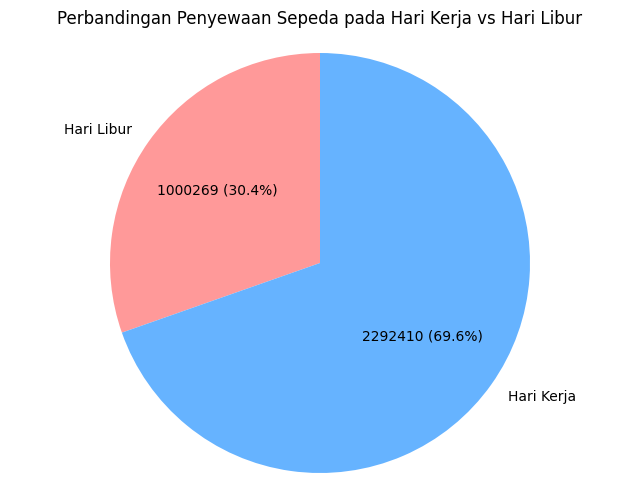

In [30]:
# Menghitung total penyewaan untuk hari kerja dan hari libur
workday_rentals = day_df.groupby('workingday')['cnt'].sum().reset_index()

# Mengganti label workingday dengan deskripsi
labels = ['Hari Libur', 'Hari Kerja']
sizes = workday_rentals['cnt']

# Membuat pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, 
        labels=labels, 
        autopct=lambda p: f'{int(p * sum(sizes) / 100)} ({p:.1f}%)',  # Menampilkan jumlah dan persentase
        startangle=90, 
        colors=['#ff9999','#66b3ff'])
plt.axis('equal') 
plt.title('Perbandingan Penyewaan Sepeda pada Hari Kerja vs Hari Libur')
plt.show()


**Insight:** Grafik di atas merupakan visualisasi perbandingan jumlah penyewaan sepeda pada hari kerja dengan hari libur dalam bentuk Pie Chart. Dari grafik terlihat bahwa penyewaan sepeda pada hari kerja jauh lebih tinggi dibandingkan dengan hari libur. Persentase penyewaan sepeda pada hari kerja mencapai 69,6%, sedangkan pada hari libur hanya 30,4%. Ini menunjukkan bahwa banyak orang lebih memilih untuk menyewa sepeda saat hari kerja, mungkin untuk keperluan komuter atau aktivitas fisik lainnya.

## Conclusion

- Pertanyaan 1: Bagaimana kondisi cuaca memengaruhi jumlah penyewaan sepeda?
> Berdasarkan analisis yang telah dilakukan, dapat disimpulkan bahwa cuaca cerah merupakan faktor utama yang mendorong orang untuk menyewa sepeda. Sebaliknya, cuaca buruk cenderung mengurangi minat masyarakat untuk menggunakan layanan penyewaan sepeda. Hal ini menunjukkan bahwa mayoritas orang lebih memilih untuk bersepeda ketika kondisi cuaca nyaman dan aman.
- Pertanyaan 2: Pada pukul berapa jumlah penyewa mencapai puncaknya dan pada jam berapa jumlah penyewa paling rendah?
> Berdasarkan analisis yang telah dilakukan, dapat disimpulkan bahwa waktu-waktu sibuk untuk penyewaan sepeda adalah di sore hari, terutama sekitar pukul 17.00. Sementara itu, dini hari seperti pukul 04.00 merupakan waktu dengan permintaan paling rendah. Pada rentang waktu dini hari ini, aktivitas masyarakat umumnya lebih rendah sehingga permintaan akan layanan penyewaan sepeda juga menurun.
- Pertanyaan 3: Bagaimana perbandingan jumlah penyewa sepeda pada hari kerja dengan hari libur?
> Berdasarkan analisis yang telah dilakukan, dapat disimpulkan bahwa banyak orang lebih memilih untuk menyewa sepeda saat hari kerja (69.6%). Kemungkinan besar, ini karena banyak orang menggunakan sepeda sebagai alat transportasi untuk bekerja atau aktivitas lainnya yang berhubungan dengan pekerjaan.

In [47]:
# Menyimpan cleaned data day_df ke dalam file CSV
day_df.to_csv("cleaned_day_data.csv", index=False)

# Menyimpan cleaned data hour_df ke dalam file CSV
hour_df.to_csv("cleaned_hour_data.csv", index=False)
